# 타이타닉 생존자 예측 모델 만들기
- 데이터 수집
- 데이터 전처리
- 데이터 분석 및 모델링
- 결론 및 모델 평가

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
#1. 데이터 수집

titanic = pd.read_csv('/Users/kimjeongseob/Desktop/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
titanic_1 = titanic[['Pclass','Age','SibSp','Parch','Fare','Survived']]
titanic_1.dropna(inplace=True)
titanic.reset_index(drop=True, inplace=True)
titanic_1

/Users/kimjeongseob/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,22.0,1,0,7.2500,0
1,1,38.0,1,0,71.2833,1
2,3,26.0,0,0,7.9250,1
3,1,35.0,1,0,53.1000,1
4,3,35.0,0,0,8.0500,0
...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,0
886,2,27.0,0,0,13.0000,0
887,1,19.0,0,0,30.0000,1
889,1,26.0,0,0,30.0000,1


In [ ]:
# 데이터셋 분리

# finance data reader

In [16]:
import FinanceDataReader as fdr
import matplotlib.pyplot as mlp

In [17]:
nasdaq = fdr.DataReader('IXIC','2010')

NameError: name 'plt' is not defined

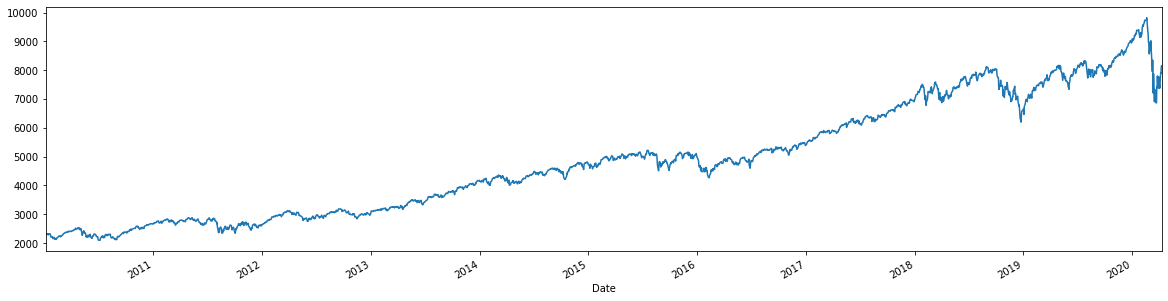

In [19]:
nasdaq['Close'].plot(figsize=(20,5))
plt.show()

In [13]:
import makedata

#### quiz
- makedata 모듈을 이용해서 데이터 프레임 만들기
- user_df
    - 8명의 데이터가 있는 데이터 프레임을 만드세요.
    - UserID : 1 ~ 8
    - Name : makedata.get_name()
    - Age  : makedata.get_age()
    - 중복되는 Name 값이 없도록

In [14]:
# 딕셔너리의 리스트 : UserID, Name, Age
datas = {}
datas["UserID"] = list(range(1, 9))
datas["Age"] = [makedata.get_age() for _ in range(8)]
names = []
while True:
    name = makedata.get_name()
    if name not in names:
        names.append(name)
    if len(names) >= 8:
        break
datas["Name"] = names

user_df = pd.DataFrame(datas)
user_df

,UserID,Age,Name
0,1,28,Arnold
1,2,20,Andrew
2,3,39,Billy
3,4,34,Alvin
4,5,29,Anchal
5,6,39,Alex
6,7,28,Adam
7,8,24,Alan


In [15]:
# 딕셔너리 데이터를 데이터 프레임에 하나씩 추가하기 : UserID, Name, Age
user_df = pd.DataFrame(columns=["UserID", "Name", "Age"])

for idx in range(1, 9):

    name = makedata.get_name()
    while name in list(user_df["Name"]):
        name = makedata.get_name()

    data = {"Name": name, "UserID": idx, "Age": makedata.get_age()}

    user_df.loc[len(user_df)] = data

user_df

,UserID,Name,Age
0,1,Jin,20
1,2,Alex,27
2,3,Billy,28
3,4,Anthony,37
4,5,Alvin,31
5,6,Andrew,34
6,7,Adam,33
7,8,Anchal,29


In [16]:
import numpy as np
import pandas as pd

#### quiz
- money_df 만들기
    - 15개의 데이터
    - ID : 1 ~ 8 랜덤한 숫자 데이터
    - Money : 1000원 단위로 1000원 ~ 20000원까지의 숫자가 저장

In [17]:
# 딕셔너리 데이터를 데이터 프레임에 하나씩 추가하기
money_df = pd.DataFrame(columns=["ID", "Money"])
# np.random.randint(1, 9)
for _ in range(15):
    money_df.loc[len(money_df)] = {
        "ID": np.random.randint(1, 9),
        "Money": np.random.randint(1, 21) * 1000,
    }

In [22]:
    
# 컬럼데이터에서 Unique 값 확인
ids = money_df["ID"].unique()
ids.sort()
len(ids), ids

money_df

,ID,Money
0,1,20000
1,4,11000
2,8,14000
3,3,6000
4,6,3000
5,2,5000
6,1,19000
7,6,16000
8,2,14000
9,8,1000


In [23]:
user_df.merge(money_df,left_on='UserID',right_on='ID')

,UserID,Name,Age,ID,Money
0,1,Jin,20,1,20000
1,1,Jin,20,1,19000
2,1,Jin,20,1,16000
3,2,Alex,27,2,5000
4,2,Alex,27,2,14000
5,2,Alex,27,2,6000
6,3,Billy,28,3,6000
7,4,Anthony,37,4,11000
8,4,Anthony,37,4,6000
9,6,Andrew,34,6,3000


In [24]:
# 컬럼명 변경
user_df.rename(columns={"UserID":"ID"},inplace=True)
user_df.tail(1)

,ID,Name,Age
7,8,Anchal,29


In [26]:
user_df.merge(money_df).head(5)

,ID,Name,Age,Money
0,1,Jin,20,20000
1,1,Jin,20,19000
2,1,Jin,20,16000
3,2,Alex,27,5000
4,2,Alex,27,14000


In [29]:
# merge의 다른 표현 (pandas 모듈안에 있는 merge를 사용)
result_df = pd.merge(user_df,money_df)
result_df

,ID,Name,Age,Money
0,1,Jin,20,20000
1,1,Jin,20,19000
2,1,Jin,20,16000
3,2,Alex,27,5000
4,2,Alex,27,14000
5,2,Alex,27,6000
6,3,Billy,28,6000
7,4,Anthony,37,11000
8,4,Anthony,37,6000
9,6,Andrew,34,3000


In [34]:
money_list = result_df.groupby('Name').sum()['Money'].reset_index()
money_list

,Name,Money
0,Adam,20000
1,Alex,25000
2,Anchal,15000
3,Andrew,37000
4,Anthony,17000
5,Billy,6000
6,Jin,55000


In [39]:
money_list = result_df.groupby('Name').agg('sum').reset_index()[["Name","Money"]]
money_list

,Name,Money
0,Adam,20000
1,Alex,25000
2,Anchal,15000
3,Andrew,37000
4,Anthony,17000
5,Billy,6000
6,Jin,55000


In [43]:
result = pd.merge(user_df,money_list,how="outer")
result

,ID,Name,Age,Money
0,1,Jin,20,55000.0
1,2,Alex,27,25000.0
2,3,Billy,28,6000.0
3,4,Anthony,37,17000.0
4,5,Alvin,31,NaN
5,6,Andrew,34,37000.0
6,7,Adam,33,20000.0
7,8,Anchal,29,15000.0


In [44]:
# fillna : NaN을 틀정 데이터로 채워줌

In [45]:
result.fillna(value=0,inplace=True)
result

,ID,Name,Age,Money
0,1,Jin,20,55000.0
1,2,Alex,27,25000.0
2,3,Billy,28,6000.0
3,4,Anthony,37,17000.0
4,5,Alvin,31,0.0
5,6,Andrew,34,37000.0
6,7,Adam,33,20000.0
7,8,Anchal,29,15000.0


In [46]:
# money 컬럼을 정수로 데이터 타입을 변경
result.dtypes

ID         int64
Name      object
Age        int64
Money    float64
dtype: object

In [52]:
result['Money']=result['Money'].astype('int')

In [53]:
result.dtypes

ID        int64
Name     object
Age       int64
Money     int64
money     int64
dtype: object

In [58]:
np.average(result.sort_values('Money',ascending=False)[:3]['Money'])

39000.0